In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('AdvertAndSales.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [5]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [6]:
data = data.dropna()

In [7]:
num = data.select_dtypes(include=['number'])
cat = data.select_dtypes(exclude=['number'])

print('numerical variables')
display(num.head())
print('\ncategorical variables')
display(cat.head())

numerical variables


,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181



categorical variables


,Influencer
0,Mega
1,Mega
2,Mega
3,Mega
4,Micro


<Axes: >

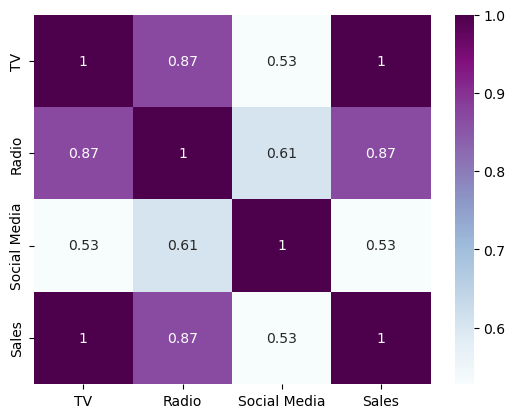

In [8]:
sns.heatmap(num.corr(), annot=True, cmap='BuPu')

In [9]:
#Data preprocessing
import joblib
from sklearn.preprocessing import LabelEncoder
for i in cat.columns:
  encoder = LabelEncoder()
  data[i] = encoder.fit_transform(data[i])
  joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181


In [10]:
#Splitting the data to Train and test

from sklearn.model_selection import train_test_split

x = data.drop('Sales', axis = 1)
y = data.Sales

xtrain, xtest, ytrain, ytest, = train_test_split(x, y, test_size = 0.2, random_state = 40)

print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')



Xtrain: (3636, 4)
Xtest: (910, 4)
Ytrain: (3636,)
Ytest: (910,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(xtrain, ytrain)
model

LinearRegression()

In [12]:
prediction = model.predict(xtrain)
r2_score(ytrain, prediction)

0.9990050933135824

In [13]:
prediction = model.predict(xtest)
r2_score(ytest, prediction)

0.9989531929797352

In [14]:
#to save and export the model
joblib.dump(model, open('advertmodel.pkl', 'wb'))